In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder


In [2]:
bank = pd.read_csv("bank-additional.csv", delimiter= ";")
bank 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [3]:
bank.columns
bank.shape
bank.dtypes.value_counts()

object     11
int64       5
float64     5
Name: count, dtype: int64

In [4]:
bank.info()
bank.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
bank.duplicated().sum()

0

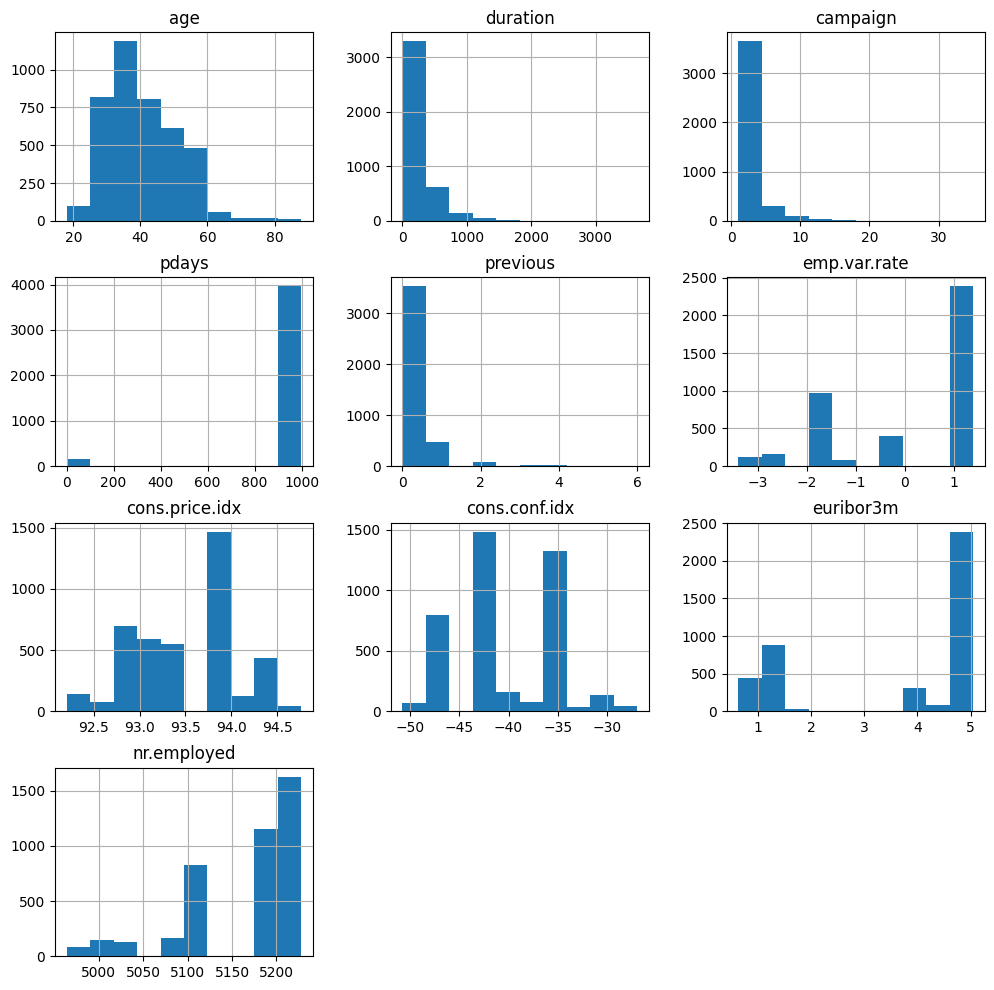

In [6]:
bank.hist(figsize= (12,12))
plt.show()

In [7]:
ob_cl = bank.select_dtypes(include = 'object').columns
print(ob_cl)

nu_cl = bank.select_dtypes(exclude= 'object').columns
print(nu_cl)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [8]:
bank.describe(include= 'object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


C:\Users\HP\AppData\Local\Temp\ipykernel_13128\782380486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = fetr, data= bank, palette= 'deep')


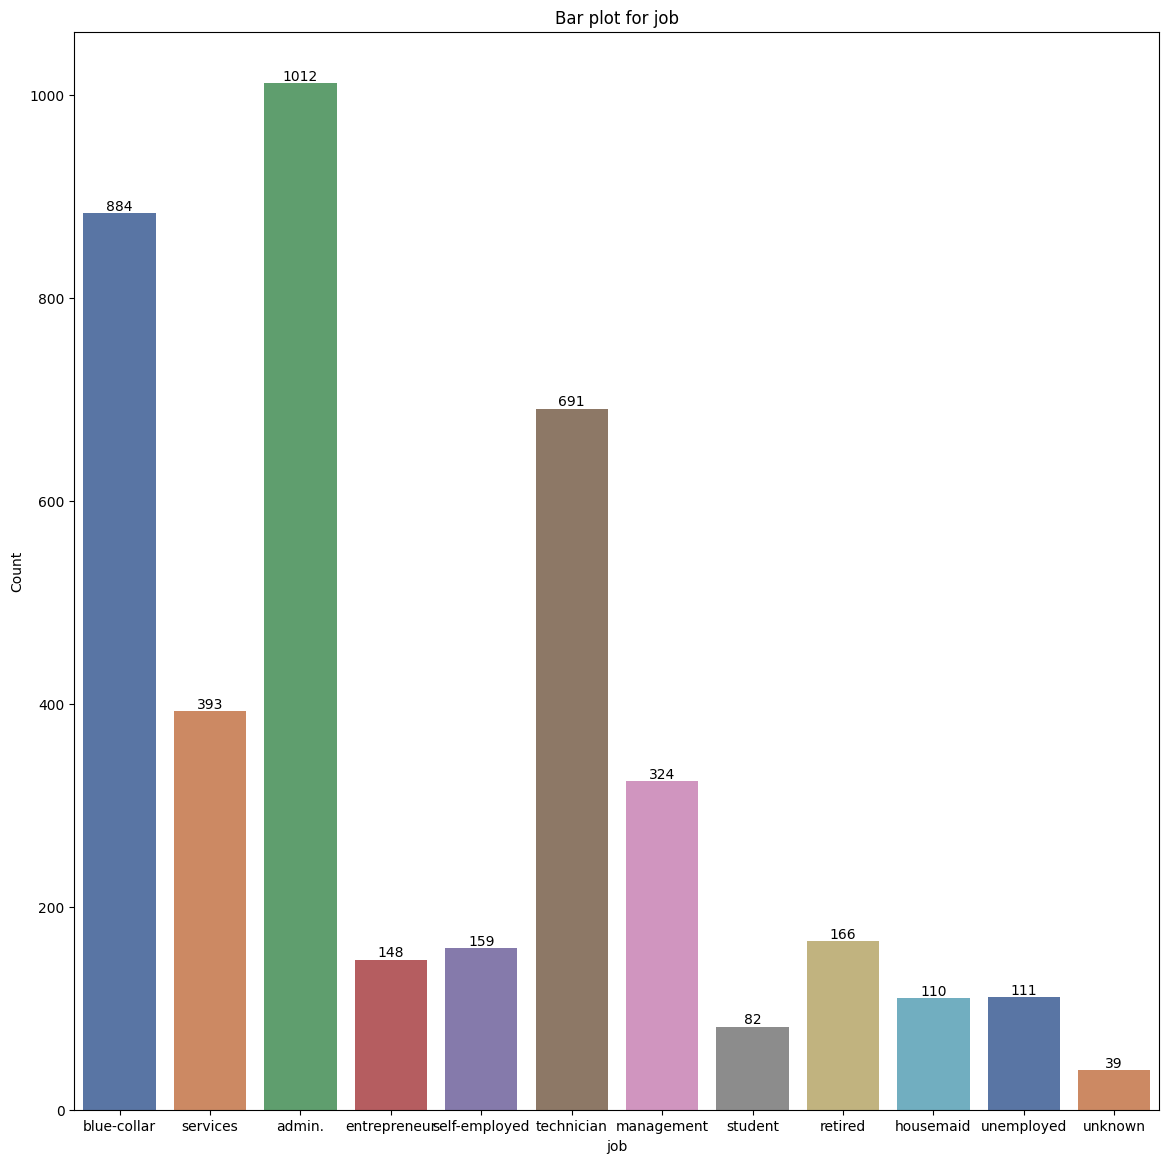

C:\Users\HP\AppData\Local\Temp\ipykernel_13128\782380486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = fetr, data= bank, palette= 'deep')


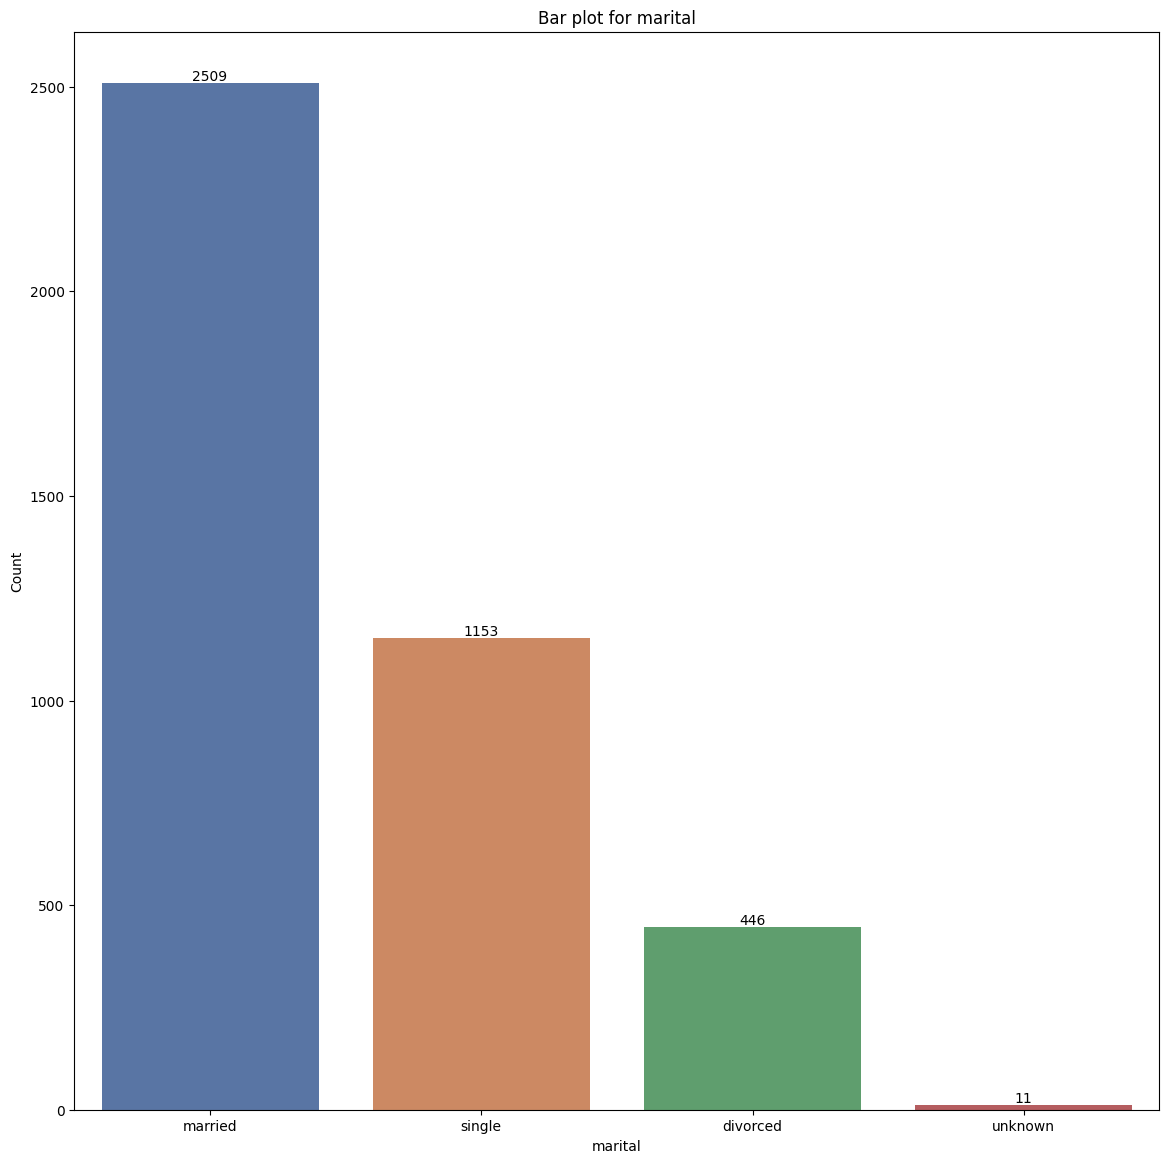

C:\Users\HP\AppData\Local\Temp\ipykernel_13128\782380486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = fetr, data= bank, palette= 'deep')


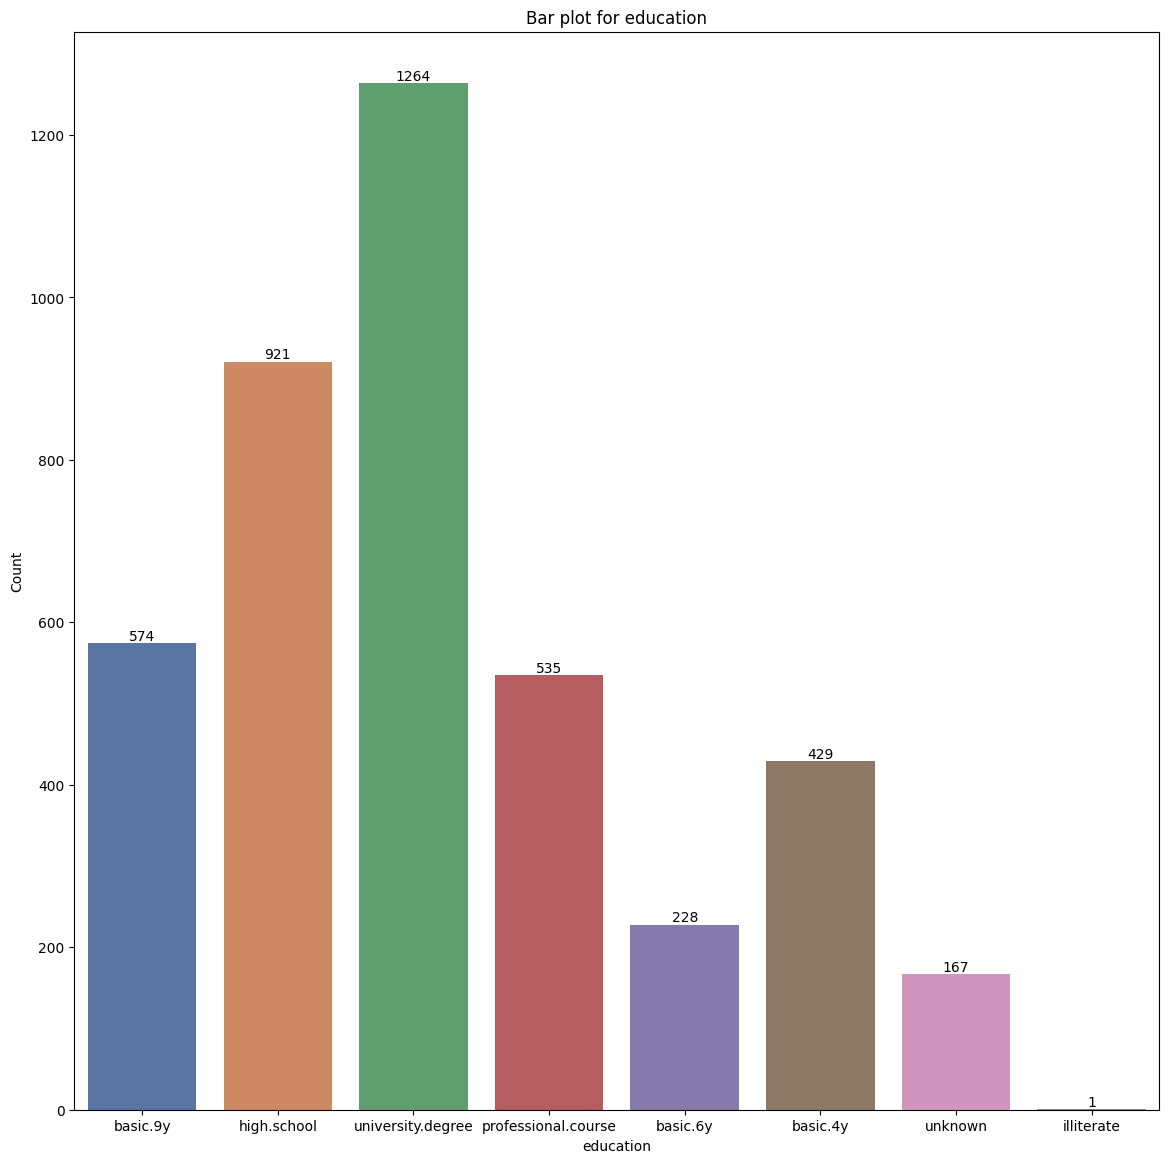

C:\Users\HP\AppData\Local\Temp\ipykernel_13128\782380486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = fetr, data= bank, palette= 'deep')


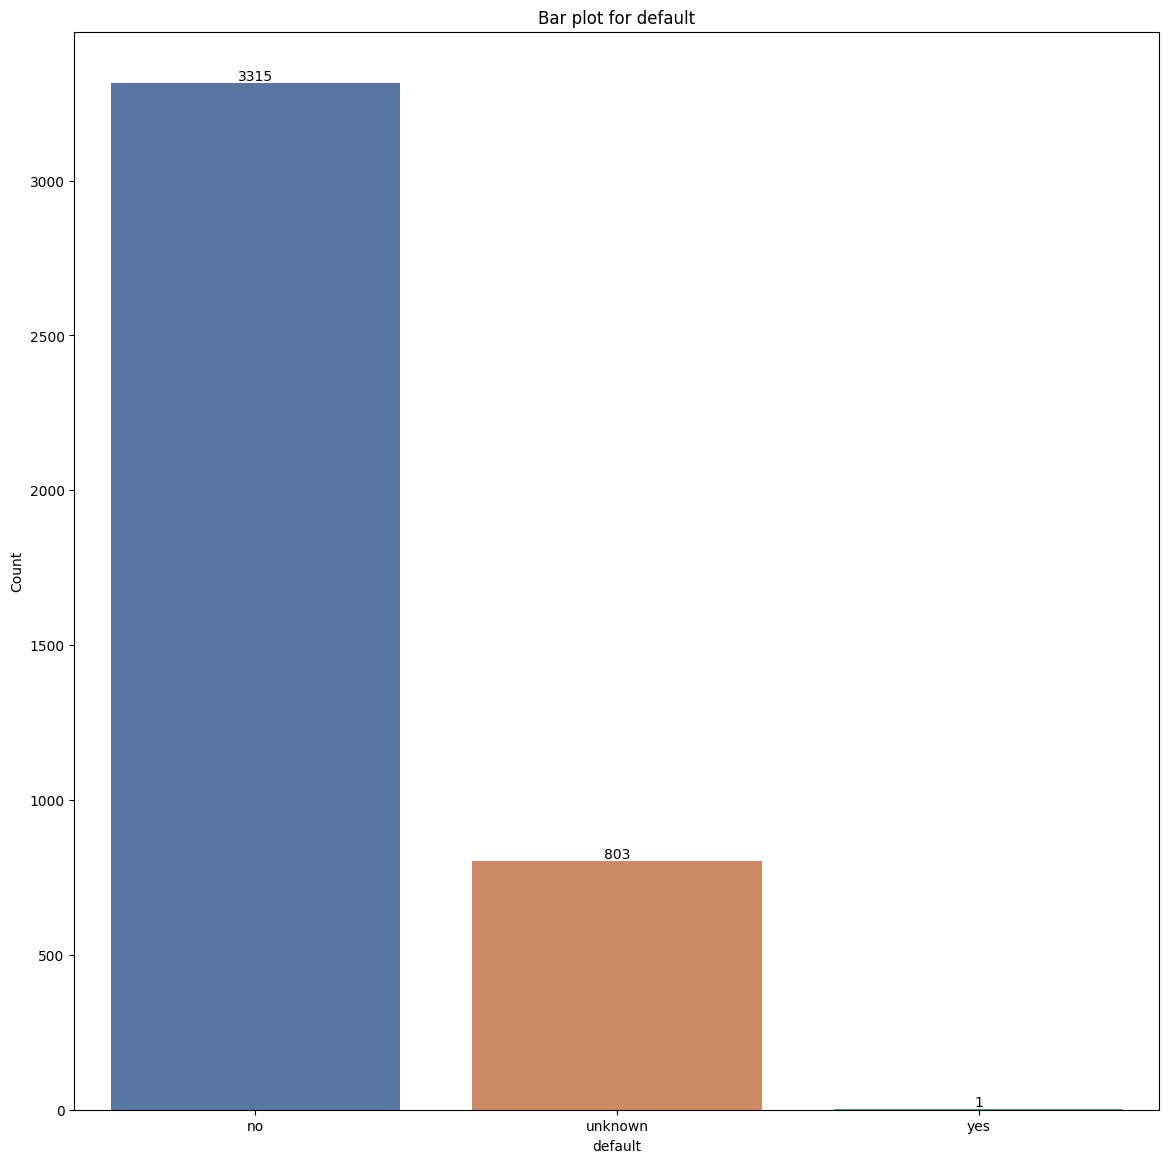

C:\Users\HP\AppData\Local\Temp\ipykernel_13128\782380486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = fetr, data= bank, palette= 'deep')


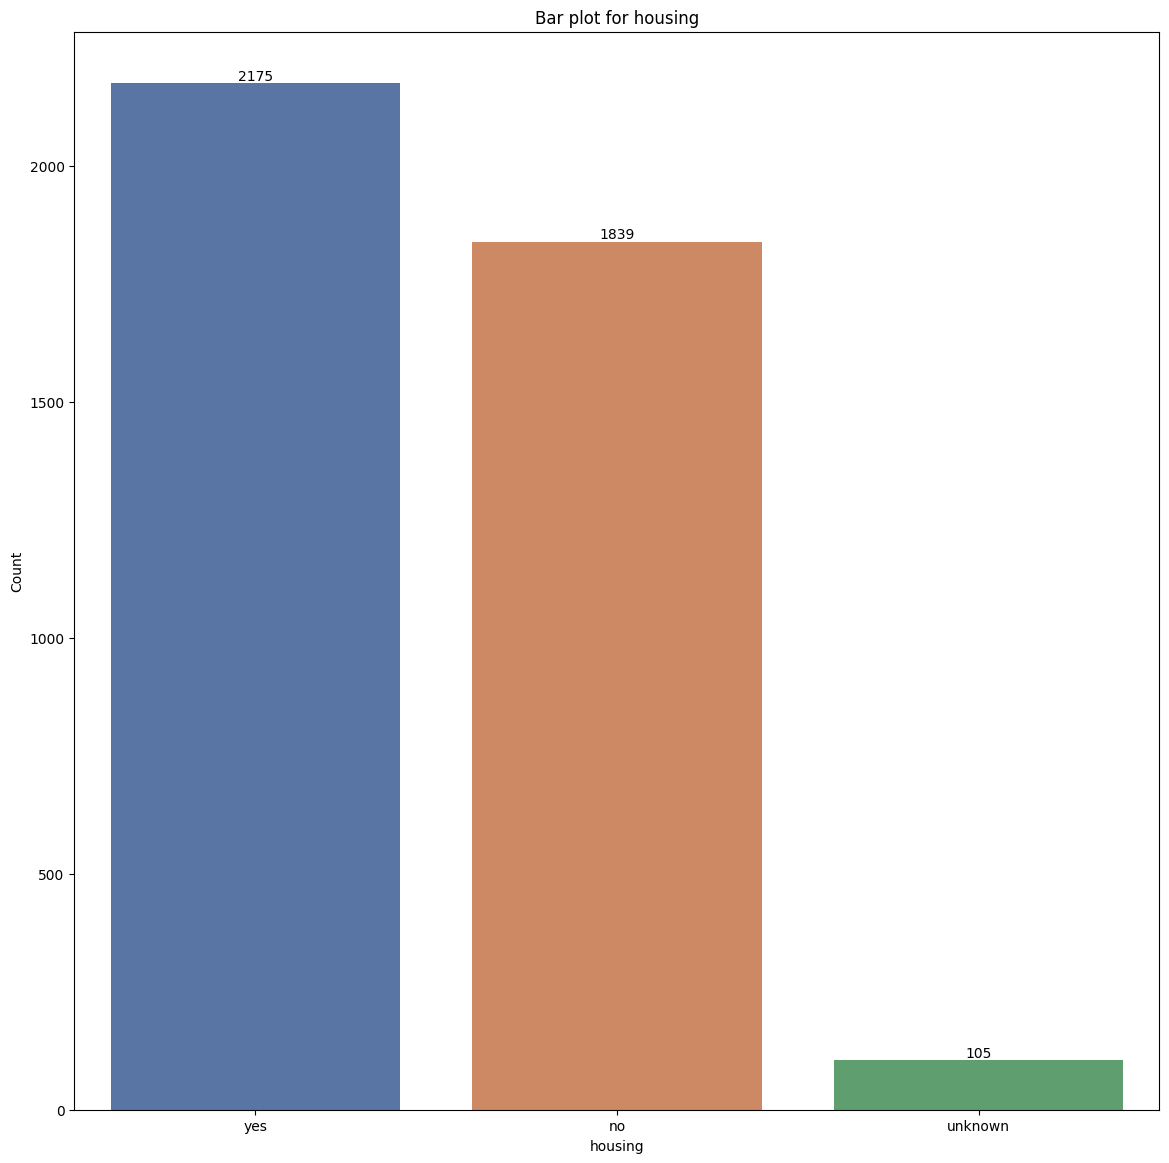

C:\Users\HP\AppData\Local\Temp\ipykernel_13128\782380486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = fetr, data= bank, palette= 'deep')


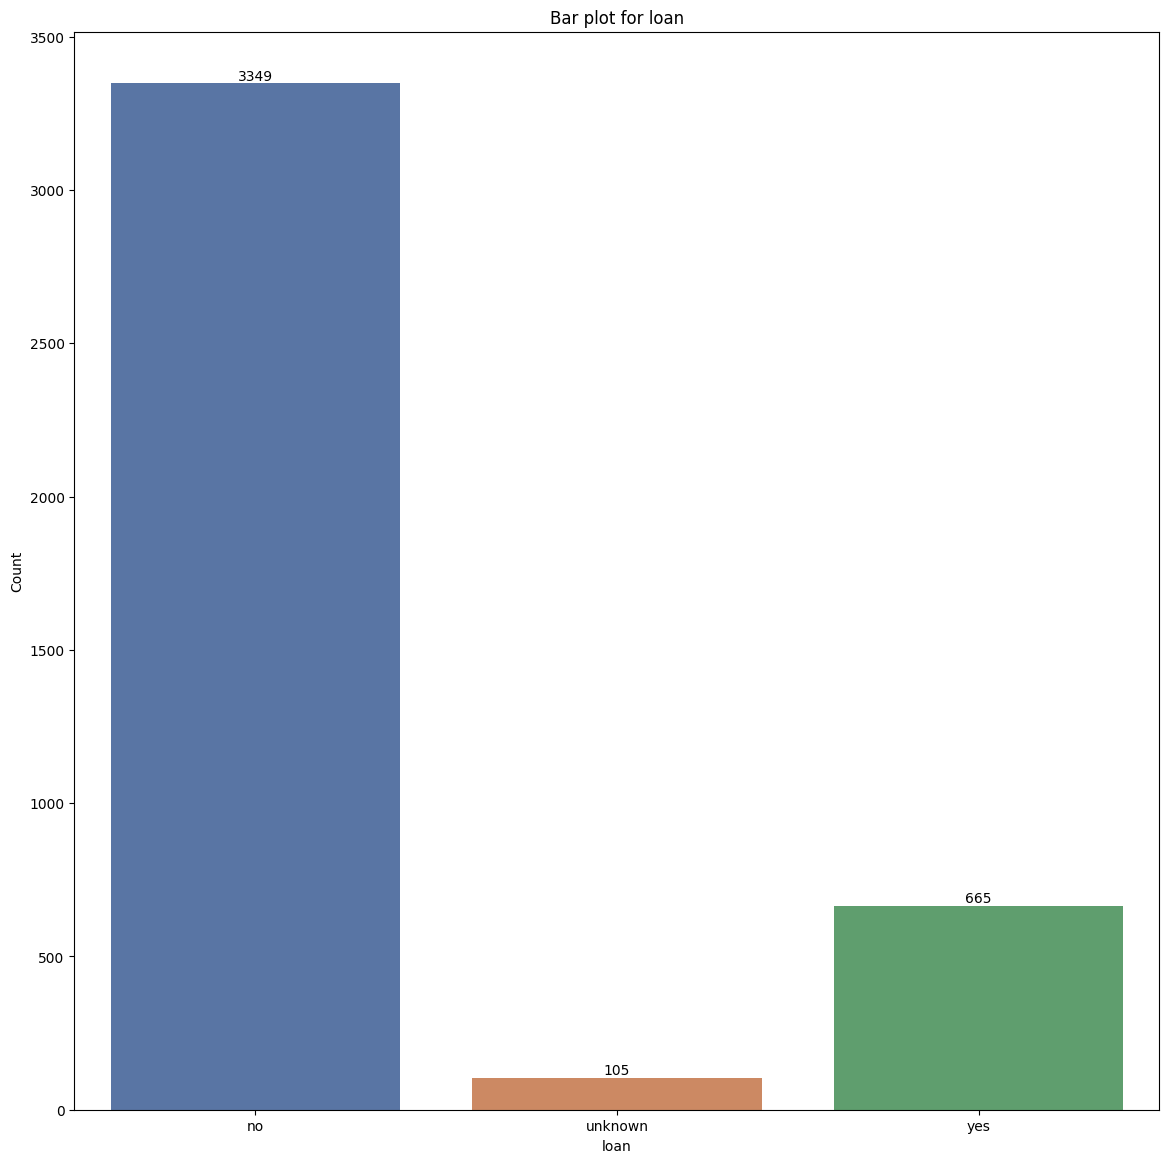

C:\Users\HP\AppData\Local\Temp\ipykernel_13128\782380486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = fetr, data= bank, palette= 'deep')


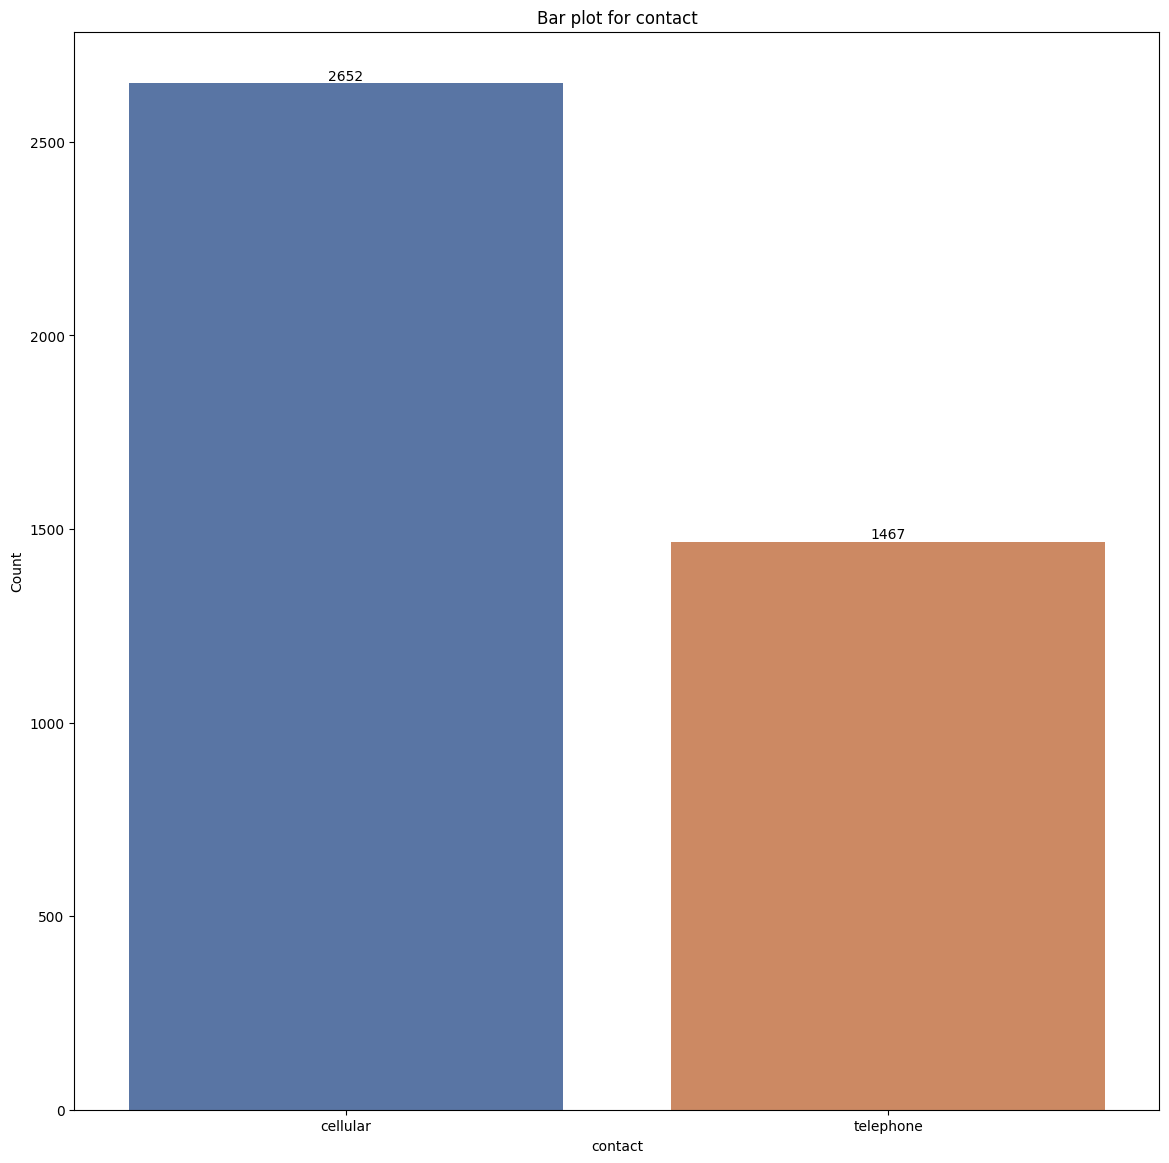

C:\Users\HP\AppData\Local\Temp\ipykernel_13128\782380486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = fetr, data= bank, palette= 'deep')


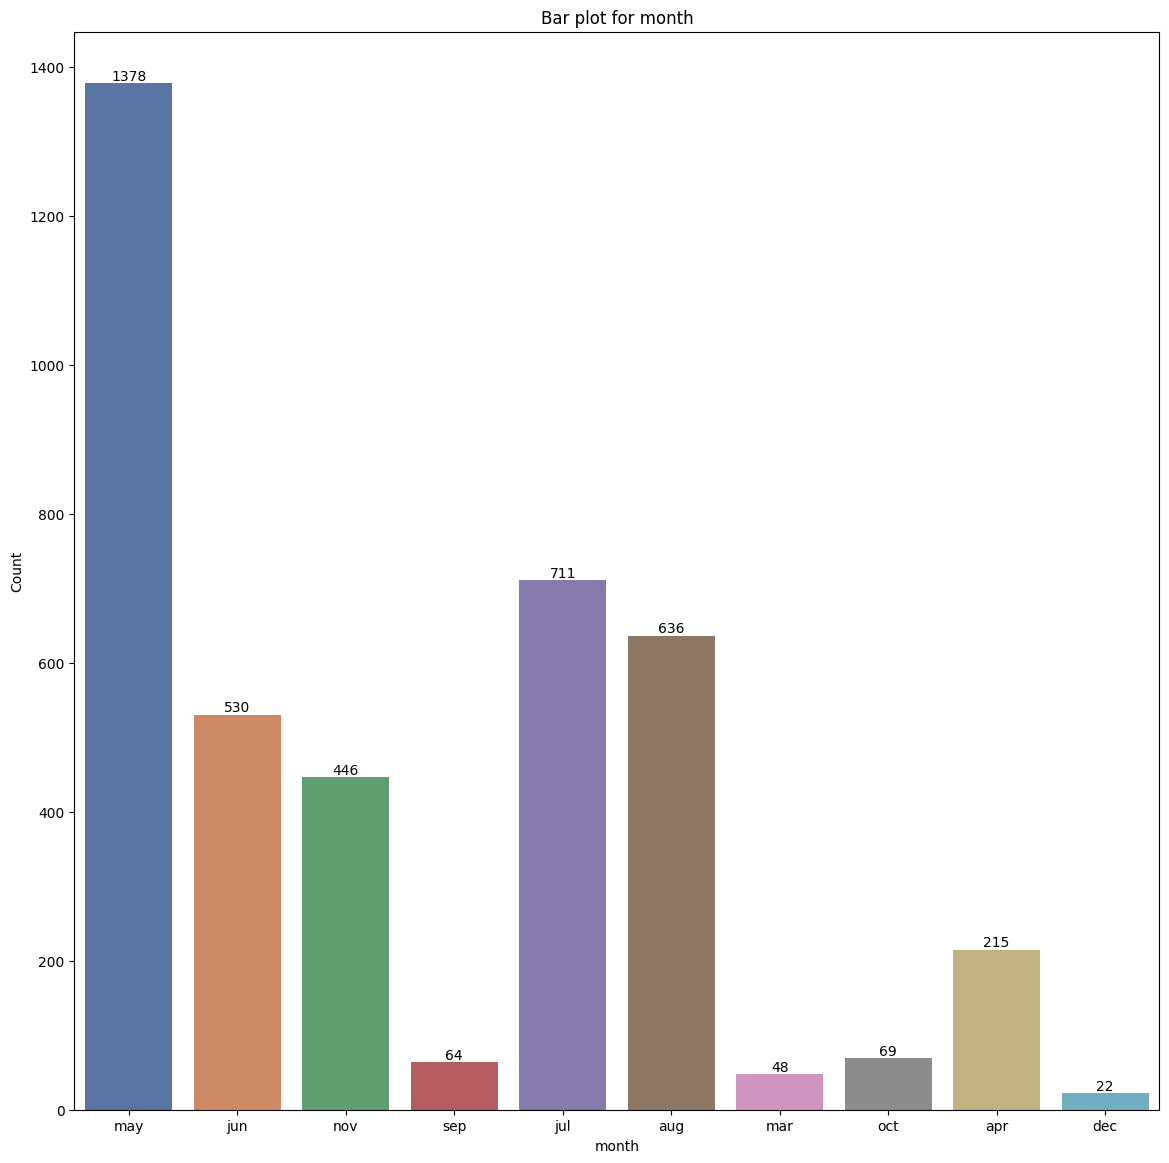

C:\Users\HP\AppData\Local\Temp\ipykernel_13128\782380486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = fetr, data= bank, palette= 'deep')


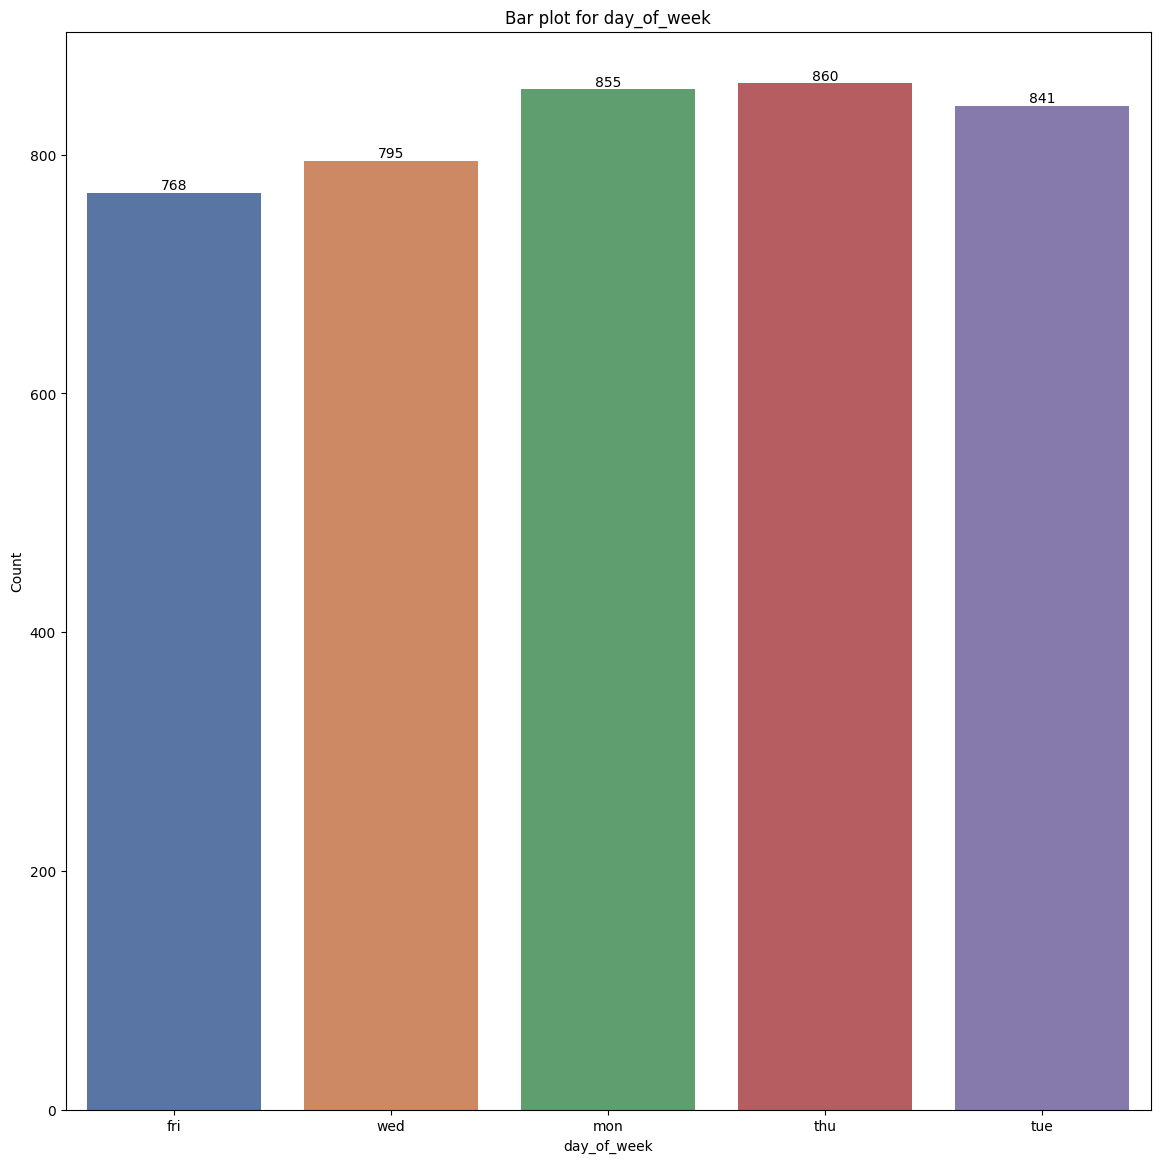

C:\Users\HP\AppData\Local\Temp\ipykernel_13128\782380486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = fetr, data= bank, palette= 'deep')


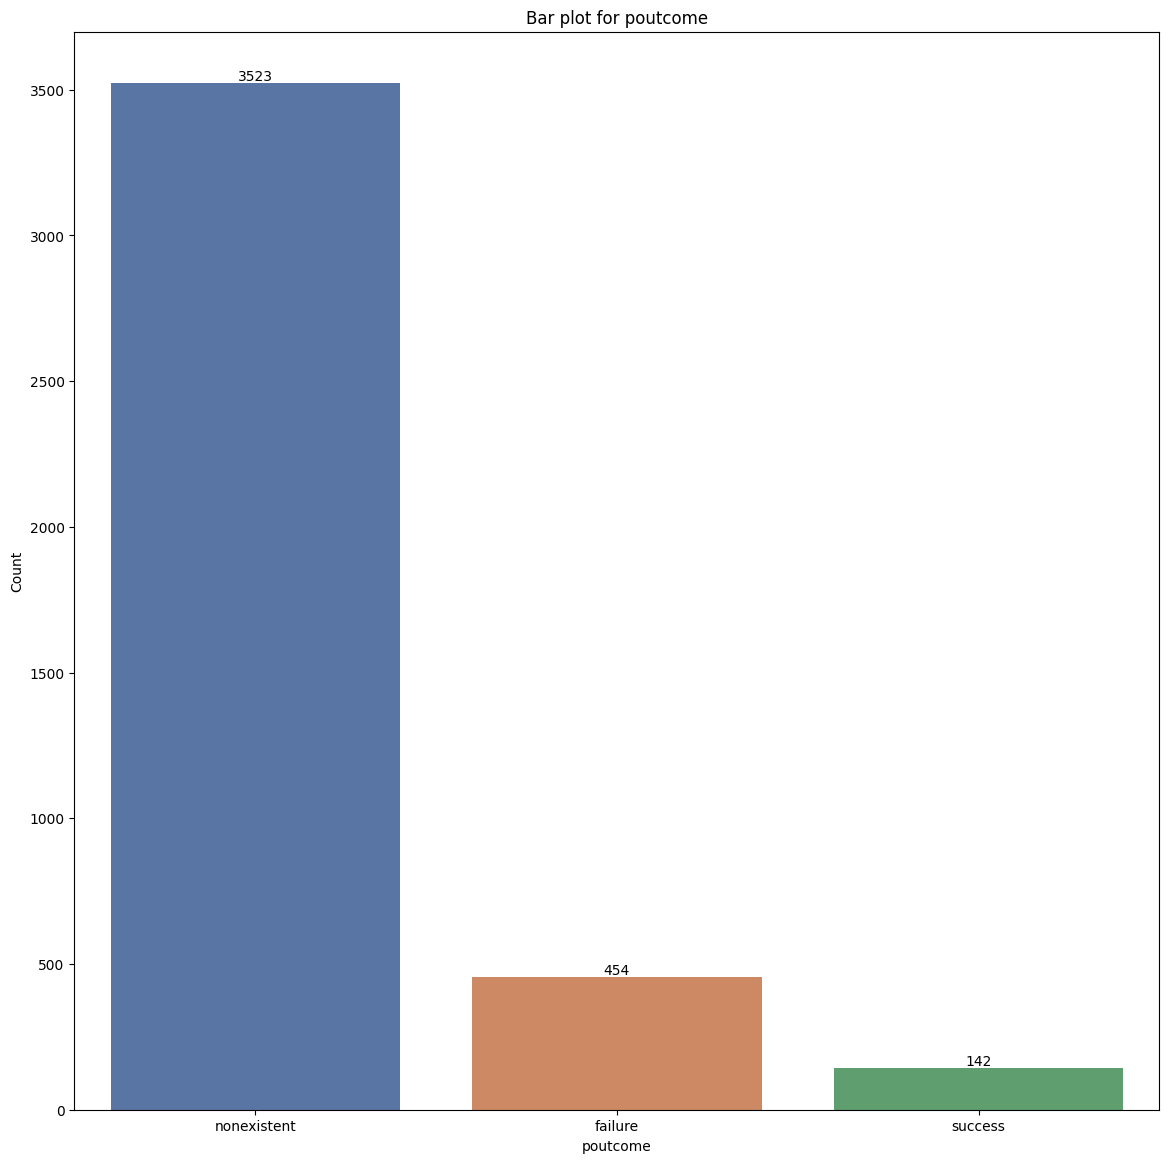

C:\Users\HP\AppData\Local\Temp\ipykernel_13128\782380486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = fetr, data= bank, palette= 'deep')


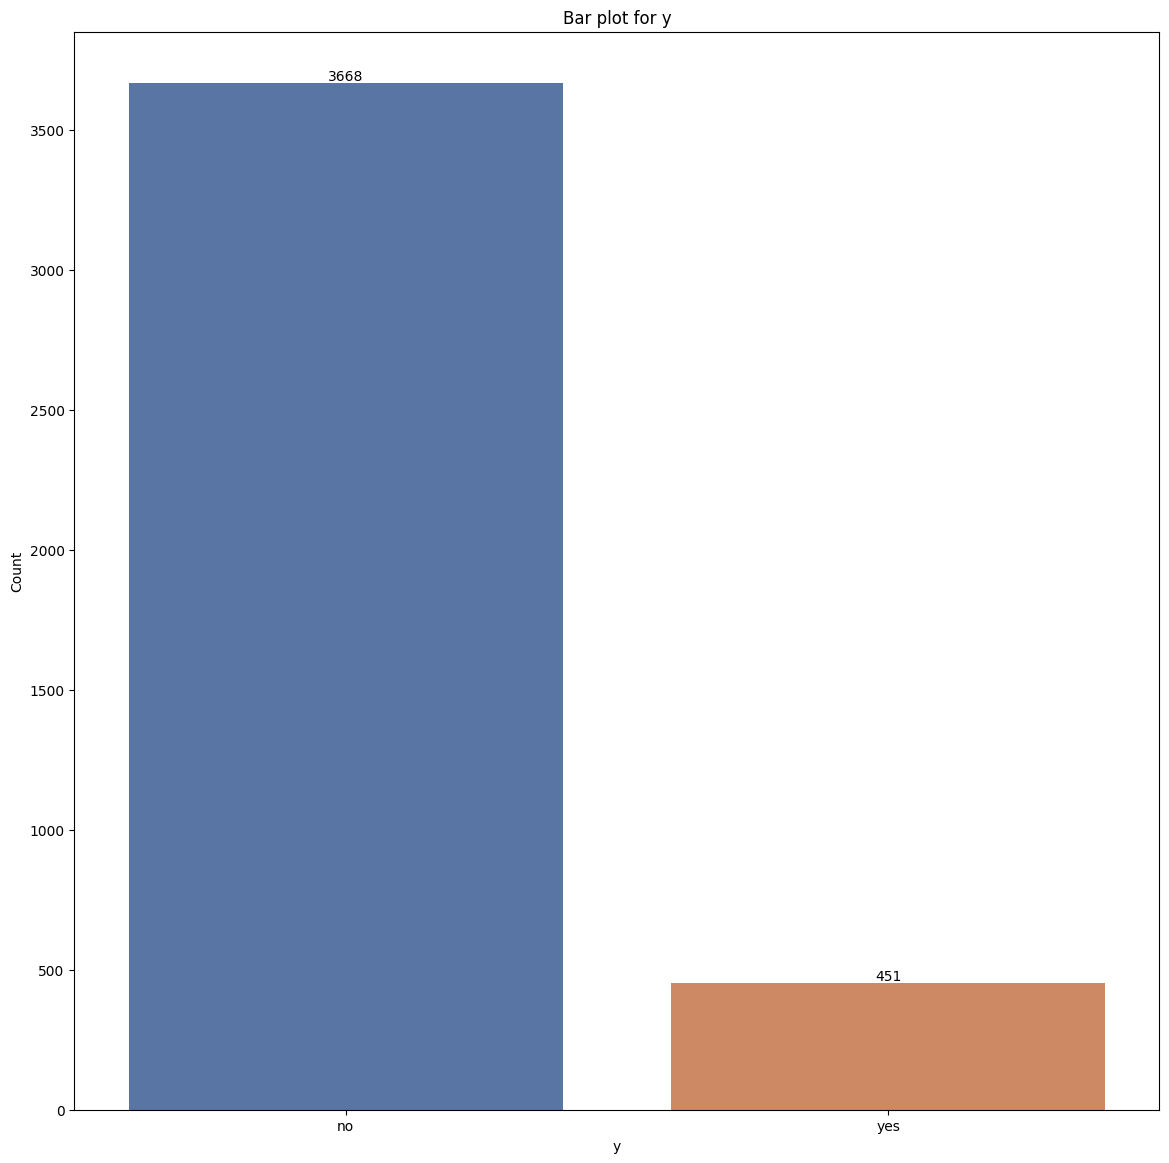

In [9]:
for fetr in ob_cl:
    plt.figure(figsize=(14,14))
    ax = sns.countplot(x = fetr, data= bank, palette= 'deep')
    for i in ax.containers:
        ax.bar_label(i,)
    plt.title(f"Bar plot for {fetr}")
    plt.xlabel(fetr)
    plt.ylabel("Count")
    plt.show()

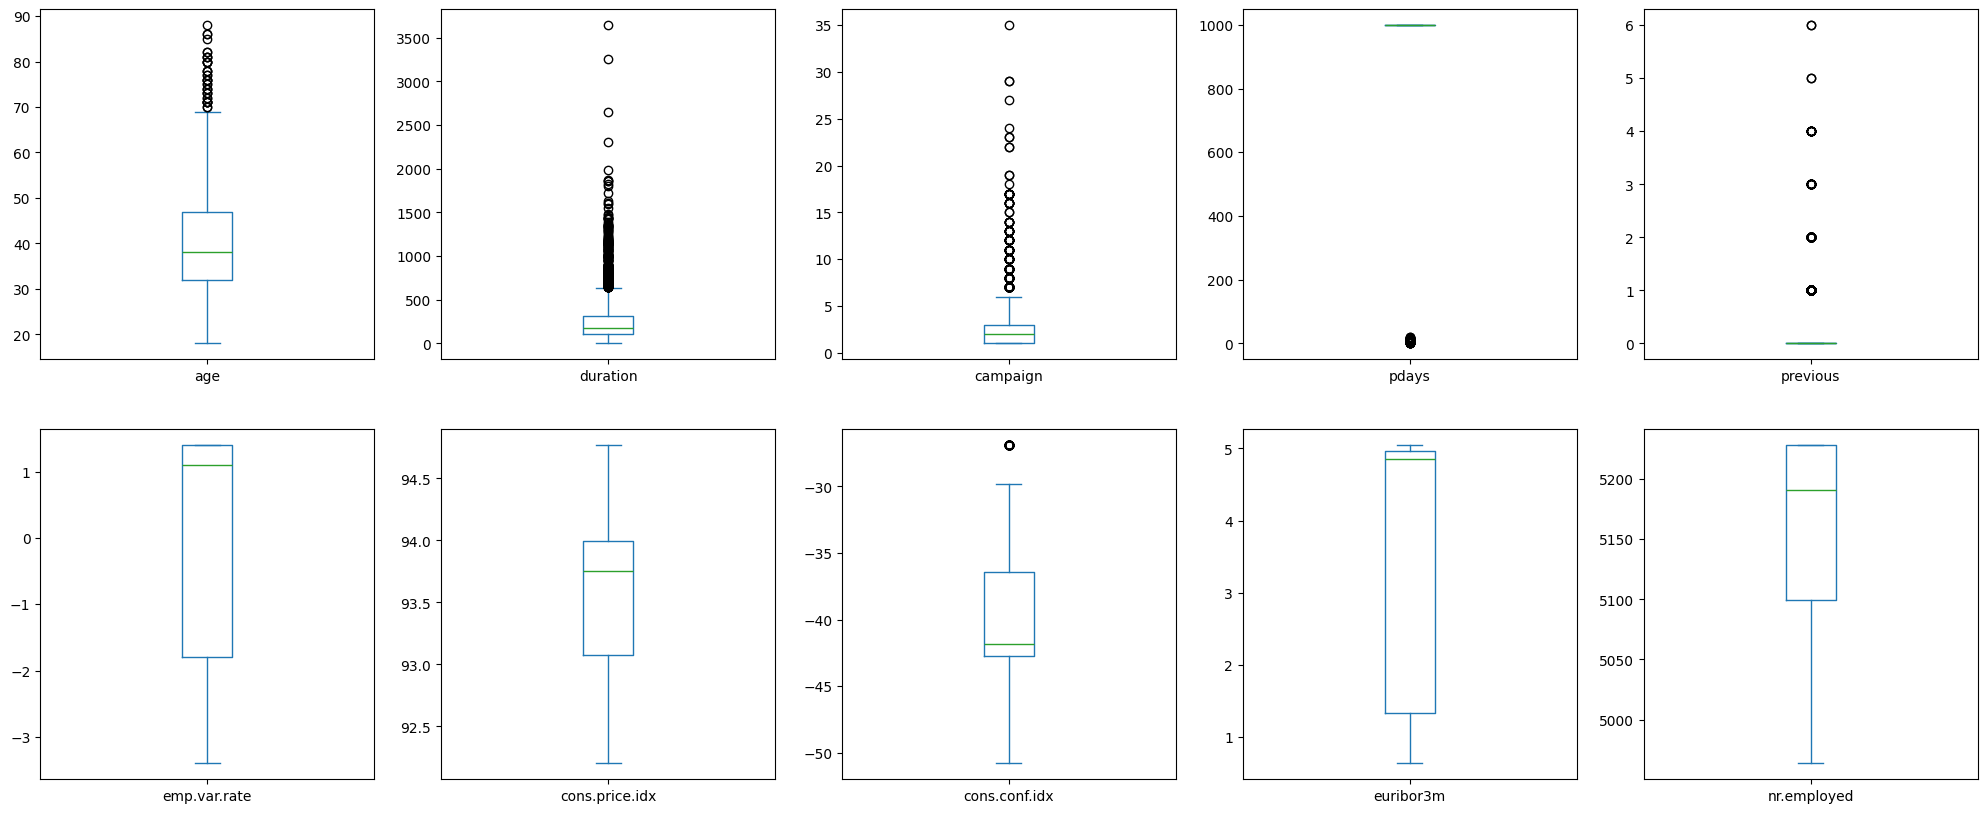

In [10]:
bank.plot(kind='box', subplots= True, layout=(2,5), figsize=(25,10))
plt.show()

In [15]:
high_cor_cols = ['emp.var.rate', 'euribor3m', 'nr.employed']


In [16]:
bank_copy = bank.copy()
bank_copy.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [20]:
lb = LabelEncoder()
bk_encoded = bank_copy.apply(lb.fit_transform)
bk_encoded.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,12,1,1,2,0,2,0,0,6,0,...,1,20,0,1,3,8,4,156,6,0
1,21,7,2,3,0,0,0,1,6,0,...,3,20,0,1,8,18,16,207,8,0
2,7,7,1,3,0,2,0,1,4,4,...,0,20,0,1,9,23,8,225,10,0
3,20,7,1,2,0,1,1,1,4,0,...,2,20,0,1,9,23,8,222,10,0
4,29,0,1,6,0,2,0,0,7,1,...,0,20,0,1,7,11,7,201,9,0
5,14,7,2,6,0,0,0,0,9,2,...,2,20,2,0,5,21,15,97,0,0
6,14,0,2,6,0,2,0,0,9,1,...,3,20,0,1,5,21,15,93,0,0
7,23,2,1,6,1,2,0,0,7,1,...,1,20,0,1,7,11,7,201,9,0
8,13,7,0,5,0,0,0,0,7,3,...,0,20,1,0,7,11,7,200,9,0
9,17,1,1,2,1,0,0,1,6,2,...,0,20,0,1,8,18,16,207,8,0


In [21]:
bk_encoded['y'].value_counts()

y
no     3668
yes     451
Name: count, dtype: int64

In [27]:
x = bk_encoded.drop('y', axis = 1)
y = bk_encoded['y']
print(x.shape)
print(y.shape)

(4119, 20)
(4119,)


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.27, random_state = 1) 
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3006, 20)
(3006,)
(1113, 20)
(1113,)


In [38]:
dtree = DecisionTreeClassifier(criterion= 'gini', max_depth=5, min_samples_split = 10)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [39]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [40]:
def evalu_model(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy_Score', acc)
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix \n", cm)
    print("Classification Report \n", classification_report(y_test, y_pred))

def mscore(model):
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    print('Training Score', train_score)
    print('Testing_score', test_score)

In [41]:
y_pred = dtree.predict(x_test)
evalu_model(y_test, y_pred)

Accuracy_Score 0.9092542677448338
Confusion Matrix 
 [[964  38]
 [ 63  48]]
Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1002
           1       0.56      0.43      0.49       111

    accuracy                           0.91      1113
   macro avg       0.75      0.70      0.72      1113
weighted avg       0.90      0.91      0.90      1113



In [42]:
mscore(dtree)

Training Score 0.927478376580173
Testing_score 0.9092542677448338


In [44]:
from sklearn.tree import plot_tree
cn = ['NO', 'YES']
fn = x_train.columns

DECISION TREE

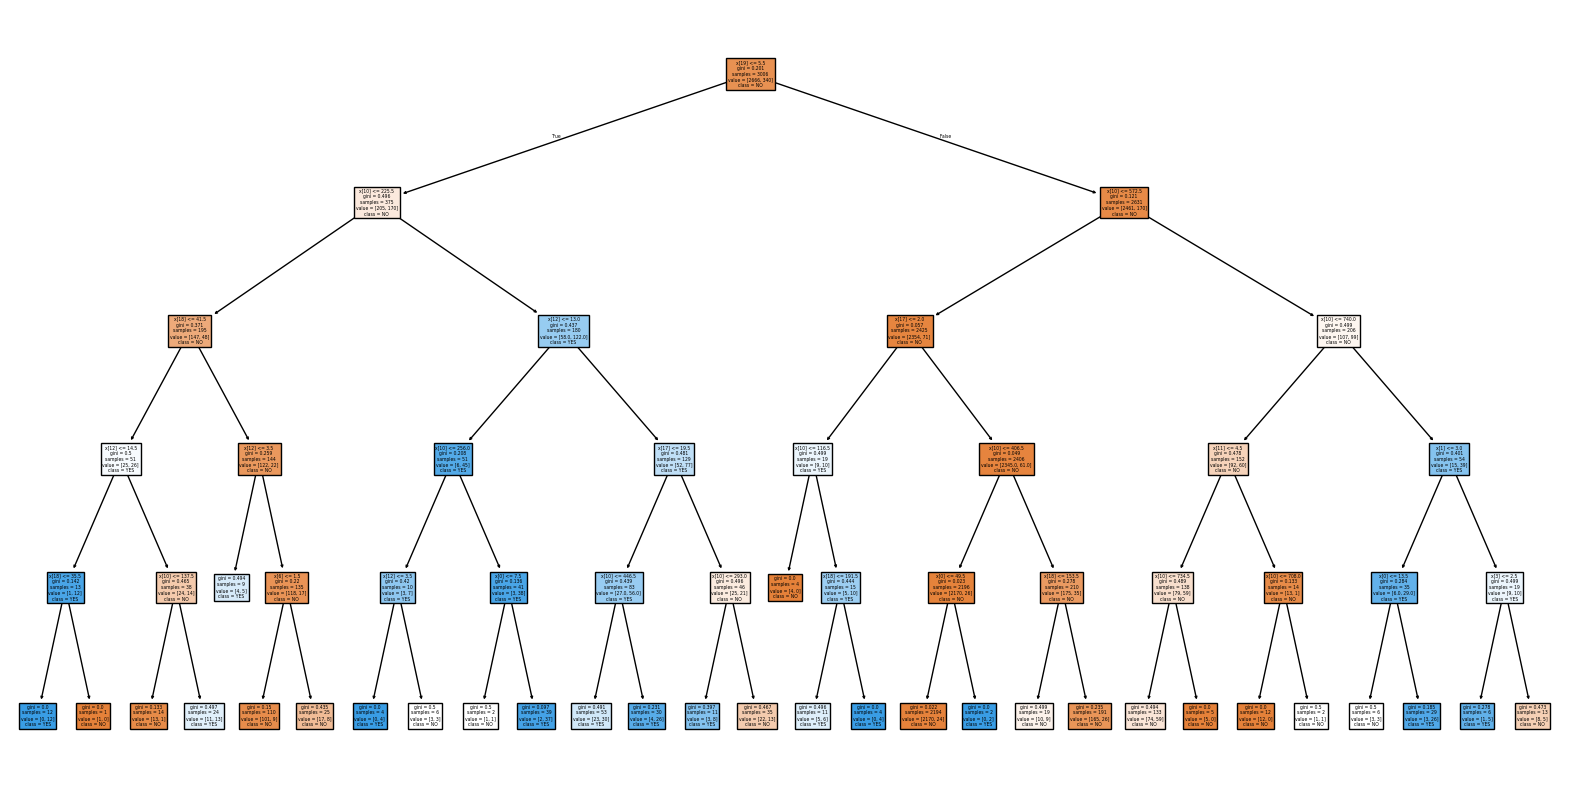

In [45]:
plt.figure(figsize=(20,10))
plot_tree(dtree, class_names=cn, filled= True)
plt.show()

In [47]:
dtree2 = DecisionTreeClassifier(criterion='entropy', max_depth = 5, min_samples_split= 15)
dtree2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=15)

In [48]:
mscore(dtree2)

Training Score 0.9311377245508982
Testing_score 0.9101527403414196


In [49]:
ypred_dtree2 = dtree2.predict(x_test)
evalu_model(y_test, ypred_dtree2) 

Accuracy_Score 0.9101527403414196
Confusion Matrix 
 [[964  38]
 [ 62  49]]
Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1002
           1       0.56      0.44      0.49       111

    accuracy                           0.91      1113
   macro avg       0.75      0.70      0.72      1113
weighted avg       0.90      0.91      0.91      1113



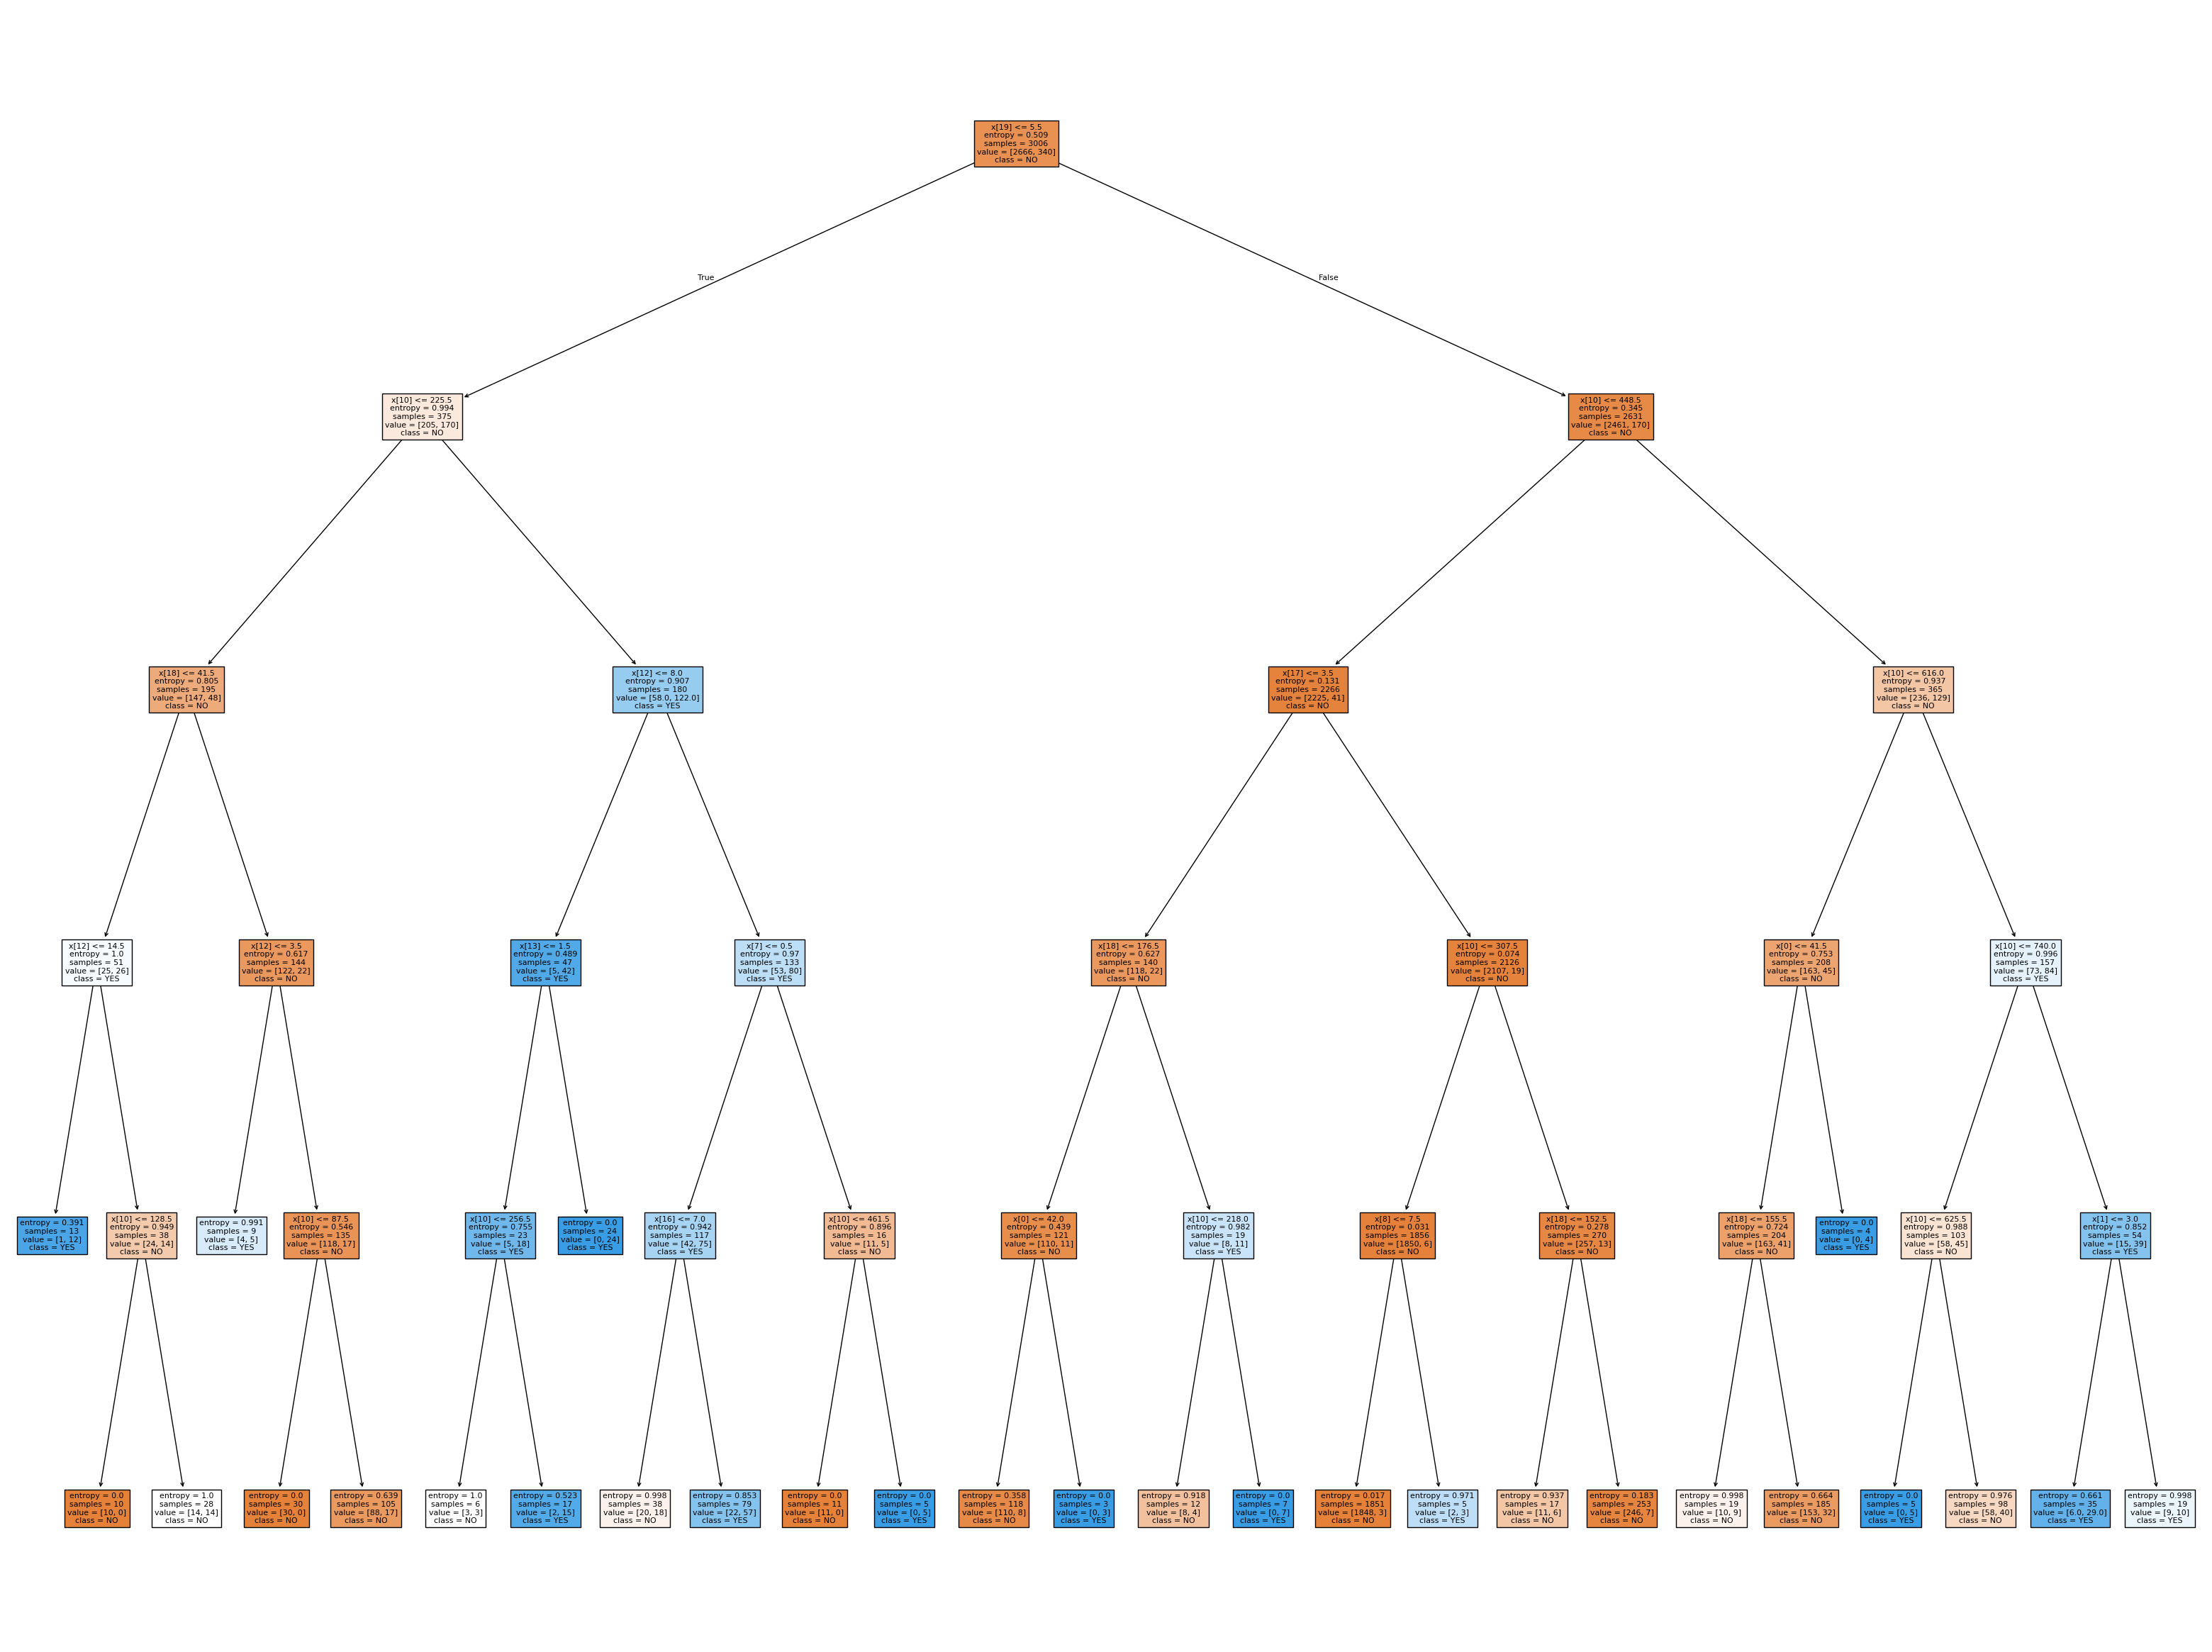

In [50]:
plt.figure(figsize= (40,30))
plot_tree(dtree2, class_names=cn, filled= True)
plt.show()